# 6.4 Machine Learning 

# Import Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to call them specifically.

%matplotlib inline

# Import Data

In [3]:
# Turn folder into path
path = r'C:\Users\davib\Documents\Final Achievement'

In [4]:
# Import transformed data
df = pd.read_csv(r'C:\Users\davib\Documents\Final Achievement\02 Data\Prepared Data\transformed_data.csv', index_col = False)

In [5]:
# Import transformed data as os
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','transformed_data.csv'),index_col = False)

# Data Cleaning

In [6]:
df.columns

Index(['CODE', 'COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP'], dtype='object')

In [7]:
df.head(20)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754
5,AFG,Afghanistan,2020-01-05,0.498,0.0,0.0,0.0,17.477233,7.497754
6,AFG,Afghanistan,2020-01-06,0.498,0.0,0.0,0.0,17.477233,7.497754
7,AFG,Afghanistan,2020-01-07,0.498,0.0,0.0,0.0,17.477233,7.497754
8,AFG,Afghanistan,2020-01-08,0.498,0.0,0.0,0.0,17.477233,7.497754
9,AFG,Afghanistan,2020-01-09,0.498,0.0,0.0,0.0,17.477233,7.497754


In [8]:
df.shape

(50418, 9)

Missing Values

In [9]:
# Check for missing values
df.isnull().sum()

CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64

Duplicates Check

In [10]:
dups = df.duplicated()

In [11]:
dups.shape

(50418,)

Extreme Values Check

C:\Users\davib\AppData\Local\Temp\ipykernel_24476\4011153993.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GDPCAP'], bins=25)


<Axes: xlabel='GDPCAP', ylabel='Density'>

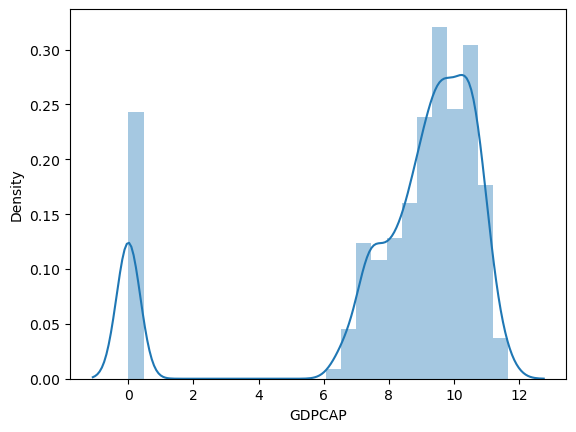

In [12]:
sns.distplot(df['GDPCAP'], bins=25)

In [13]:
df['GDPCAP'].mean()

8.318580300079079

In [14]:
df['GDPCAP'].median()

9.368531023

In [15]:
df['GDPCAP'].max()

11.66937863

# Data Prep for Regression Analysis

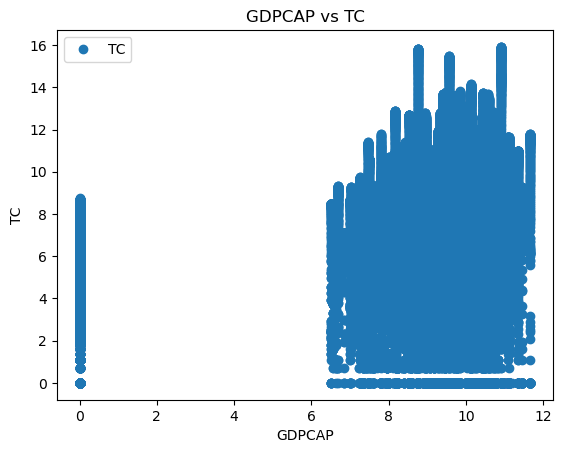

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'GDPCAP', y='TC',style='o') 
plt.title('GDPCAP vs TC')  
plt.xlabel('GDPCAP')  
plt.ylabel('TC')  
plt.show()

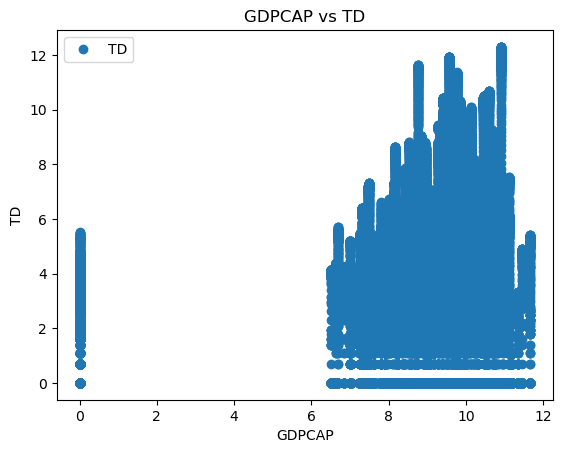

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'GDPCAP', y='TD',style='o') 
plt.title('GDPCAP vs TD')  
plt.xlabel('GDPCAP')  
plt.ylabel('TD')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['GDPCAP'].values.reshape(-1,1)
y = df['TD'].values.reshape(-1,1)

In [20]:
X

array([[7.49775449],
       [7.49775449],
       [7.49775449],
       ...,
       [7.54949074],
       [7.54949074],
       [7.54949074]])

In [21]:
y

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [5.44241771],
       [5.44241771],
       [5.44241771]])

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['GDPCAP'].values.reshape(-1,1)
y = df['TC'].values.reshape(-1,1)

In [23]:
X

array([[7.49775449],
       [7.49775449],
       [7.49775449],
       ...,
       [7.54949074],
       [7.54949074],
       [7.54949074]])

In [24]:
y

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [8.99949588],
       [9.00085315],
       [9.00540504]])

In [25]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [26]:
# Create a regression object.
regression = LinearRegression()

In [28]:
# Fit the regression object onto the training set.
regression.fit (X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

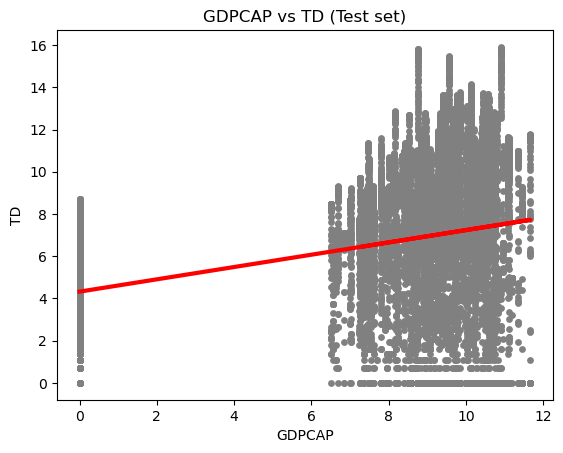

In [30]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDPCAP vs TD (Test set)')
plot_test.xlabel('GDPCAP')
plot_test.ylabel('TD')
plot_test.show()

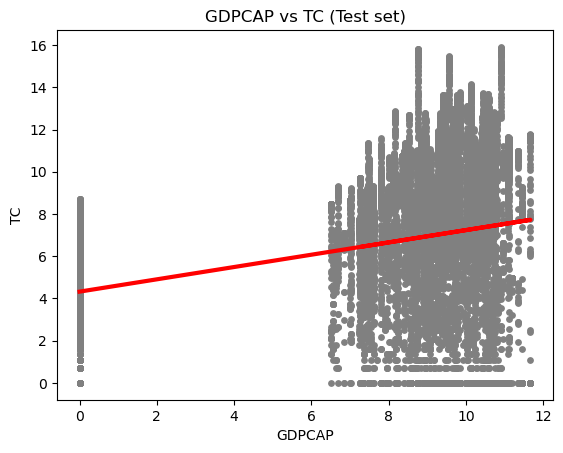

In [31]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDPCAP vs TC (Test set)')
plot_test.xlabel('GDPCAP')
plot_test.ylabel('TC')
plot_test.show()

In [32]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [33]:
# Print the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2914981]]
Mean squared error:  12.356170445798401
R2 score:  0.066288457078158


In [34]:
y_predicted

array([[6.45754342],
       [7.35304886],
       [7.18884607],
       ...,
       [7.11885551],
       [6.9555238 ],
       [4.32372812]])

In [35]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.663562,6.457543
1,0.000000,7.353049
2,9.388905,7.188846
3,8.317278,7.295644
4,3.332205,7.468629
5,0.000000,7.041267
6,5.049856,6.922131
7,0.000000,7.510994
8,6.413459,7.386042
9,7.335634,7.351338


Compare how the regression fits the training set

In [36]:
# Predict.
y_predicted_train = regression.predict(X_train)

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2914981]]
Mean squared error:  12.370842205425042
R2 score:  0.06479491833353324


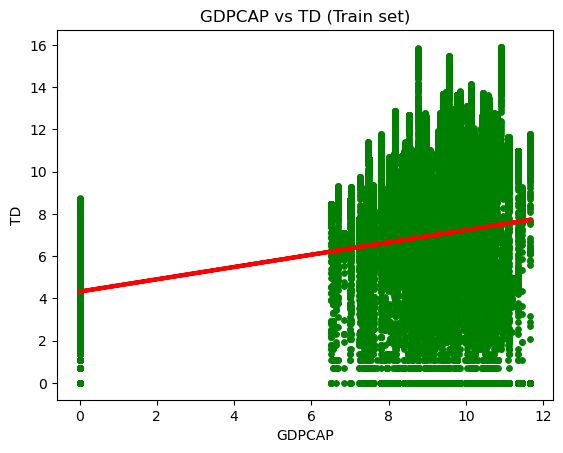

In [39]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDPCAP vs TD (Train set)')
plot_test.xlabel('GDPCAP')
plot_test.ylabel('TD')
plot_test.show()

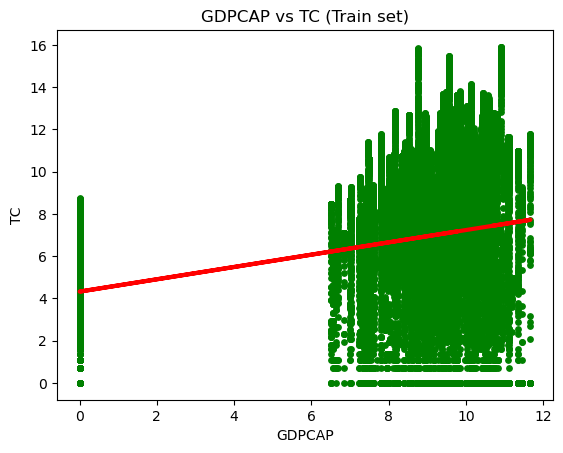

In [40]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDPCAP vs TC (Train set)')
plot_test.xlabel('GDPCAP')
plot_test.ylabel('TC')
plot_test.show()

5a: The larger the population, and the more deaths and cases of Covid-19 the greater the impact of Covid-19 on their economy.

10: I think the graph shows that the line appears to fit the data, but I think I should change the GDPCAP variable to the STI.

13: I think that there is a relationship between GDPCAP and total cases and deaths.

13a: I think the impact of of possible data bias may give inaccurate results.